# BME-230B Spring 2019 HW 2 Question 4
James Casaletto, Andrew Davidson, Yuanqing Xue, Jim Zheng

## 4.a. [10 pts] 
Turn in code that can compute a bb-l-k-NNG from a given bb-k-NNG. In addition to the input bb-k-NNG, the method should take in a parameter specifying the number of subsampled graphs that should be returned. Each of the returned subsampled graphs should represent a distinct sub-sampled bb-l-k-NNG from the given input graph. Fill in the l_k_bbknn method in euclid_bknn.py. You can set the l parameter accordingly. NOTE: in order to run this function successfully you will have to run the bbknn() method first, and then run the l_k_bbknn method. Consult example usage within euclid_bbknn.py.


In [1]:
from euclid_bbknn import bbknn_graph
from bblknn import bblknn_graph
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
print("scanpy.__version__:{}".format(sc.__version__))

scanpy.__version__:1.4


In [2]:
%%time
anndata = sc.read("PBMC.merged.h5ad")

CPU times: user 4.2 s, sys: 128 ms, total: 4.32 s
Wall time: 1.52 s


In [3]:
%%time
# run our implementation of batch-balanced nearest neighbors and update anndata
bbknn_graph(anndata, neighbors_within_batch=6, runPCA=True, pcs=50)

CPU times: user 5min 5s, sys: 9.08 s, total: 5min 14s
Wall time: 4min 50s


In [4]:
# run louvain clustering on bb6nn
sc.tl.louvain(anndata, flavor='igraph', directed=False, use_weights=True)

In [5]:
# save louvain assignments for bb6nn so we can use them in part b
bb6nn_louvain = anndata.obs['louvain']

In [6]:
%%time
# run our implementation of subsampled batch-balanced nearest neighbors
bblknn_graph(anndata, k_per_batch=6, l=3, n_components=50)

CPU times: user 6min 20s, sys: 16.4 s, total: 6min 37s
Wall time: 5min 17s


## 4.b. [10 pts] 
Turn in a bar plot of the Adjusted Rand Index (ARI) for Louvain clusters obtained from 10 independently subsampled bb-3-6-NNGs compared to the Louvain clusters obtained on the original bb-6-NNGs. Also report the average and standard deviations of the ARI. Based on these results, would you conclude these clusters are robust? Justify your answer. Hint: check if your ARI is significantly better than chance.


In [9]:
from sklearn.metrics.cluster import adjusted_rand_score

# number of samples to run
samples = 10

# list of ARIs obtained from each sample
results = []

for sample in range(samples):
    # subsample batch-balanced nearest neighbors
    bblknn_graph(anndata, k_per_batch=6, l=3, n_components=50)
    
    # run louvain clustering on subsampled graph
    sc.tl.louvain(anndata)
    bb3_6nn_louvain = anndata.obs['louvain']
    
    # calculate and store ARI
    ars = adjusted_rand_score(bb6nn_louvain, bb3_6nn_louvain)
    results.append(ars)
    
    # print iteration progress
    print(sample+1, end=' ')

1 2 3 4 5 6 7 8 9 10 

Average: 0.6062524085875942 SD: 0.031101843378884712


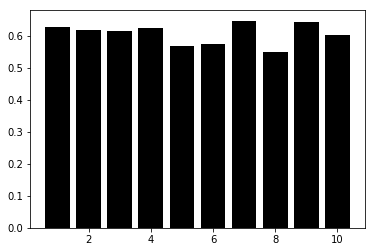

In [11]:
# plot ARIs and print statistics
plt.bar(range(1, len(results)+1), results, color='black')
print('Average:', np.mean(results), 'SD:', np.std(results))